In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
# to display all columns names
pd.set_option('display.max_columns', None)

In [4]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
# checking for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# drop the countrys with null values
df['country'].dropna(inplace=True)

In [7]:
# fill the company and agent null values with 0 because they booked by thier own
df.fillna(0, inplace=True)

In [8]:
# re-checking for null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# change children type to int 
df['children'] = df['children'].astype(int)

In [11]:
# there cant be a booking with any adult, children or babies
mask = (df['adults'] == 0 ) & (df['children'] == 0 ) & (df['babies'] == 0)

In [12]:
df[mask]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0         0       0   SC     PRT   
2409                       0       0         0       0   SC     PRT   
3181                       2       0         0       0   SC     ESP   
3684                       4       0         0       0   SC     PRT   
3708                       4       0         0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0         0       0   BB     CHE   
115091                     1       0         0       0   SC     PRT   
116251                     1       0         0       0   SC     SWE   
116534                     5       0         0       0   SC     RUS   
117087                     2       0         0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [13]:
# so we drop them
df = df[~mask]

In [14]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2         0       0   BB     PRT   
1                          0       2         0       0   BB     PRT   
2                          1       1         0       0   BB     GBR   
3                          1       1         0       0   BB     GBR   
4                          2       2         0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2         0       0   BB     BEL   
119386                     5       3         0       0   BB     FRA   
119387                     5       2         0       0   BB     DEU   
119388                     5       2         0       0   BB     GBR   
119389                     7       2         0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [15]:
# there cant be a booking that does not have any weekend or weekday nights
mask2 = (df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)

In [16]:
df[mask2]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
167     Resort Hotel            0        111               2015   
168     Resort Hotel            0          0               2015   
196     Resort Hotel            0          8               2015   
...              ...          ...        ...                ...   
115483    City Hotel            0         15               2017   
117701    City Hotel            0          0               2017   
118029    City Hotel            0          0               2017   
118631    City Hotel            0         78               2017   
118963    City Hotel            0          1               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
167                  July                        28   
168                  July                        28   
196                  July                        28   
...                   ...                       ...   
115483               July                        27   
117701             August                        32   
118029             August                        33   
118631             August                        34   
118963             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
167                             6                        0   
168                             6                        0   
196                             7                        0   
...                           ...                      ...   
115483                          6                        0   
117701                          8                        0   
118029                         14                        0   
118631                         23                        0   
118963                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2         0       0   BB     PRT   
1                          0       2         0       0   BB     PRT   
167                        0       2         0       0   BB     PRT   
168                        0       1         0       0   BB     PRT   
196                        0       2         0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
115483                     0       1         0       0   SC     FRA   
117701                     0       2         0       0   BB     PRT   
118029                     0       2         0       0   BB     PRT   
118631                     0       1         0       0   BB     PRT   
118963                     0       2         0       0   BB     PRT   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
167         Online TA                TA/TO                  0   
168            Direct               Direct                  0   
196            Direct               Direct                  0   
...               ...                  ...                ...   
115483         Direct               Direct                  0   
117701  Offline TA/TO                TA/TO                  1   
118029         Direct               Direct                  1   
118631  Offline TA/TO                TA/TO                  0   
118963         Direct               Direct                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [17]:
# so we drop them
df = df[~mask2]

In [18]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1         0       0   BB     GBR   
3                          1       1         0       0   BB     GBR   
4                          2       2         0       0   BB     GBR   
5                          2       2         0       0   BB     GBR   
6                          2       2         0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2         0       0   BB     BEL   
119386                     5       3         0       0   BB     FRA   
119387                     5       2         0       0   BB     DEU   
119388                     5       2         0       0   BB     GBR   
119389                     7       2         0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int32  
 11  babies                          118565 non-null  int64  
 12  meal            

In [20]:
# saving the data for EDA
df.to_csv('EDA_data.csv', index=False)

In [21]:
# modeling data
df_model = df

In [22]:
# checking the correlation 
correlation = df_model.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.291515
total_of_special_requests         0.236165
required_car_parking_spaces       0.196804
booking_changes                   0.145198
previous_cancellations            0.109974
company                           0.083745
is_repeated_guest                 0.077791
adults                            0.057575
previous_bookings_not_canceled    0.057541
days_in_waiting_list              0.053941
agent                             0.046315
adr                               0.039368
babies                            0.032672
stays_in_week_nights              0.020703
arrival_date_year                 0.015438
arrival_date_week_number          0.009019
arrival_date_day_of_month         0.006108
stays_in_weekend_nights           0.004859
children                          0.004678
Name: is_canceled, dtype: float64

In [23]:
# spliting reservation date to year, month and day
df_model['reservation_status_date'] = pd.to_datetime(df_model['reservation_status_date'])  

df_model['year'] = df_model['reservation_status_date'].dt.year 
df_model['month'] = df_model['reservation_status_date'].dt.month 
df_model['day'] = df_model['reservation_status_date'].dt.day

D:\anaconda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
# droping unwanted columns
unwanted_columns = ['country', 'assigned_room_type', 'arrival_date_year', 'arrival_date_month', 'reservation_status', 'reservation_status_date', 'days_in_waiting_list']
df_model.drop(unwanted_columns, axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
# checking for unique values to map them 
# df_model['year'].unique()

In [26]:
# maping the columns to binary variable
df_model['hotel'] = df_model['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

df_model['meal'] = df_model['meal'].map({'BB' : 0, 'FB' : 1, 'HB' : 2, 'SC' : 3, 'Undefined' : 4})

df_model['market_segment'] = df_model['market_segment'].map({'Direct' : 0, 'Corporate' : 1, 'Online TA' : 2, 'Offline TA/TO' : 3,'Complementary' : 4, 'Groups' : 5, 'Undefined' : 6, 'Aviation' : 7})

df_model['distribution_channel'] = df_model['distribution_channel'].map({'Direct' : 0, 'Corporate' : 1, 'TA/TO' : 2, 'Undefined' : 3, 'GDS' : 4})

df_model['reserved_room_type'] = df_model['reserved_room_type'].map({'A' : 0, 'C' : 1, 'D' : 2, 'E' : 3, 'G' : 4, 'F' : 5, 'H' : 6, 'L' : 7, 'B' : 8})

df_model['deposit_type'] = df_model['deposit_type'].map({'No Deposit' : 0, 'Refundable' : 1, 'Non Refund' : 2})

df_model['customer_type'] = df_model['customer_type'].map({'Transient' : 0, 'Contract' : 1, 'Transient-Party' : 2, 'Group' : 3})

df_model['year'] = df_model['year'].map({2015 : 0, 2014 : 1, 2016 : 2, 2017 : 3})

In [27]:
df_model['is_canceled'].value_counts()

0    74389
1    44176
Name: is_canceled, dtype: int64

In [28]:
df_model

hotel  is_canceled  lead_time  arrival_date_week_number  \
2           0            0          7                        27   
3           0            0         13                        27   
4           0            0         14                        27   
5           0            0         14                        27   
6           0            0          0                        27   
...       ...          ...        ...                       ...   
119385      1            0         23                        35   
119386      1            0        102                        35   
119387      1            0         34                        35   
119388      1            0        109                        35   
119389      1            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  meal  market_segment  \
2                          1       1         0       0     0               0   
3                          1       1         0       0     0               1   
4                          2       2         0       0     0               2   
5                          2       2         0       0     0               2   
6                          2       2         0       0     0               0   
...                      ...     ...       ...     ...   ...             ...   
119385                     5       2         0       0     0               3   
119386                     5       3         0       0     0               2   
119387                     5       2         0       0     0               2   
119388                     5       2         0       0     0               2   
119389                     7       2         0       0     2               2   

        distribution_channel  is_repeated_guest  previous_cancellations  \
2                          0                  0                       0   
3                          1                  0                       0   
4                          2                  0                       0   
5                          2                  0                       0   
6                          0                  0                       0   
...                      ...                ...                     ...   
119385                     2                  0                       0   
119386                     2                  0                       0   
119387                     2                  0                       0   
119388                     2                  0                       0   
119389                     2                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  booking_changes  \
2                                    0                   0                0   
3                                    0                   0                0   
4                                    0                   0                0   
5                                    0                   0                0   
6                                    0                   1                0   
...                                ...                 ...              ...   
119385                               0     

In [29]:
df_model.var()

hotel                                 0.222628
is_canceled                           0.233768
lead_time                         11430.928201
arrival_date_week_number            184.670443
arrival_date_day_of_month            77.127519
stays_in_weekend_nights               0.990944
stays_in_week_nights                  3.584426
adults                                0.331133
children                              0.159296
babies                                0.009518
meal                                  1.138612
market_segment                        2.018508
distribution_channel                  0.461872
is_repeated_guest                     0.028641
previous_cancellations                0.717701
previous_bookings_not_canceled        2.252098
reserved_room_type                    2.188623
booking_changes                       0.406571
deposit_type                          0.432269
agent                             11473.023410
company                            2885.743891
customer_type

In [30]:
x = df_model.drop('is_canceled', axis=1)
y = df_model.is_canceled

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=123)

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)
Log_Reg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

KNN_3 = KNeighborsClassifier(n_neighbors = 1)
KNN_3.fit(x_train, y_train)

KNN_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
KNN_gscv = GridSearchCV(KNN_2, param_grid, cv=5)
KNN_gscv.fit(x_train,y_train)

knn.fit(x_train,y_train)
Log_Reg.fit(x_train, y_train)
dtree.fit(x_train,y_train)
rf.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [33]:
KNN_gscv.best_params_

{'n_neighbors': 1}

In [34]:
KNN_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [35]:
KNN_gscv.best_score_

0.8723658051689862

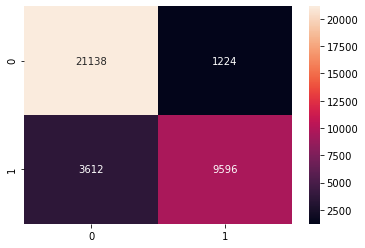

In [36]:
y_pred_knn = knn.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, fmt=".0f");

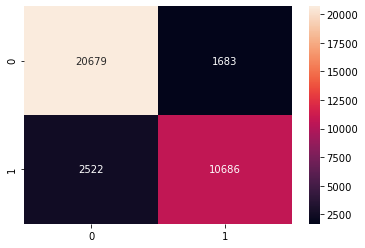

In [37]:
y_pred_KNN_3 = KNN_3.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_KNN_3), annot=True, fmt=".0f");

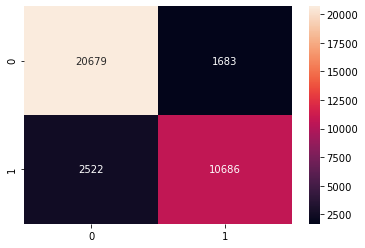

In [38]:
y_pred_KNN = KNN_gscv.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_KNN), annot=True, fmt=".0f");

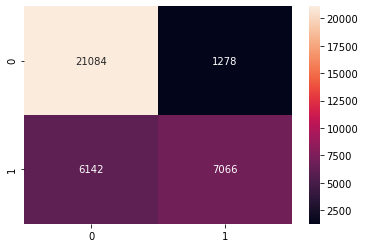

In [39]:
y_pred_log = Log_Reg.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_log), annot=True, fmt=".0f");

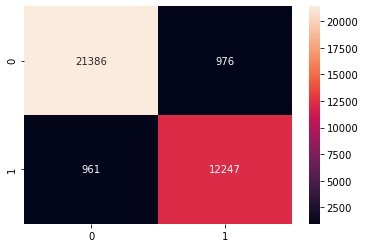

In [40]:
y_pred_tree = dtree.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_tree), annot=True, fmt=".0f");

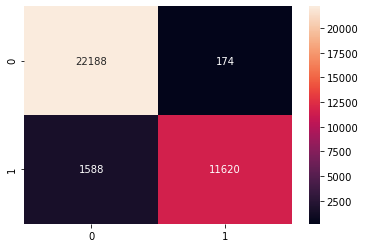

In [41]:
y_pred_rf = rf.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt=".0f");

In [42]:
print('For KNN model k=5')
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

print ('accuracy =',accuracy_knn * 100)
print ('precision =',precision_knn * 100)
print ('recall =',recall_knn * 100)
print ('f1_score =',f1_score_knn * 100)

print('\n')

print('For KNN model k=1')
accuracy_knn1 = accuracy_score(y_test, y_pred_KNN_3)
precision_knn1 = precision_score(y_test, y_pred_KNN_3)
recall_knn1 = recall_score(y_test, y_pred_KNN_3)
f1_score_knn1 = f1_score(y_test, y_pred_KNN_3)

print ('accuracy =',accuracy_knn1 * 100)
print ('precision =',precision_knn1 * 100)
print ('recall =',recall_knn1 * 100)
print ('f1_score =',f1_score_knn1 * 100)

print('\n')

print('For Logistic Regression model')
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_score_log = f1_score(y_test, y_pred_log)

print ('accuracy =',accuracy_log * 100)
print ('precision =',precision_log * 100)
print ('recall =',recall_log * 100)
print ('f1_score =',f1_score_log * 100)

print('\n')

print('For Decision Tree model')
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print ('accuracy =',accuracy_tree * 100)
print ('precision =',precision_tree * 100)
print ('recall =',recall_tree * 100)
print ('f1_score =',f1_score_tree * 100)

print('\n')

print('For Random Forest model')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print ('accuracy =',accuracy_rf * 100)
print ('precision =',precision_rf * 100)
print ('recall =',recall_rf * 100)
print ('f1_score =',f1_score_rf * 100)

For KNN model k=5
accuracy = 86.40427326398651
precision = 88.68761552680222
recall = 72.65293761356753
f1_score = 79.8734809389046


For KNN model k=1
accuracy = 88.17824008996345
precision = 86.39340286199369
recall = 80.90551181102363
f1_score = 83.55944794150994


For Logistic Regression model
accuracy = 79.1397244869272
precision = 84.68360498561842
recall = 53.49788007268322
f1_score = 65.57164068299926


For Decision Tree model
accuracy = 94.55439977509137
precision = 92.61892157604174
recall = 92.72410660205935
f1_score = 92.67148424198858


For Random Forest model
accuracy = 95.04638740511668
precision = 98.52467356282855
recall = 87.97698364627499
f1_score = 92.95256379489642


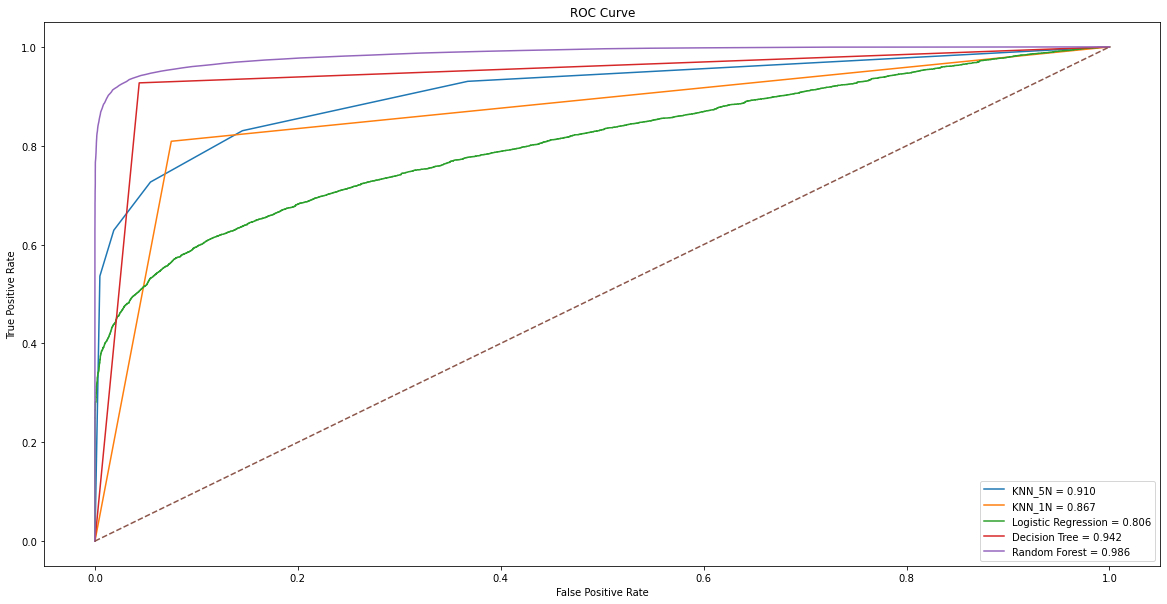

In [43]:
plt.figure(figsize=(20, 10))
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, KNN_3.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, Log_Reg.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

auc_knn = roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])
k5 = 'KNN_5N = '+"%.3f" % auc_knn
auc_knn3 = roc_auc_score(y_test, KNN_3.predict_proba(x_test)[:,1])
k1 = 'KNN_1N = '+"%.3f" % auc_knn3
auc_log = roc_auc_score(y_test, Log_Reg.predict_proba(x_test)[:,1])
log = 'Logistic Regression = '+"%.3f" % auc_log
auc_dtree = roc_auc_score(y_test, dtree.predict_proba(x_test)[:,1])
tree = 'Decision Tree = '+"%.3f" % auc_dtree
auc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
rf = 'Random Forest = '+"%.3f" % auc_rf

xx = np.linspace(0,1, 100000)
plt.plot(xx, xx, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend([k5, k1, log, tree, rf])

Visulization for EDA

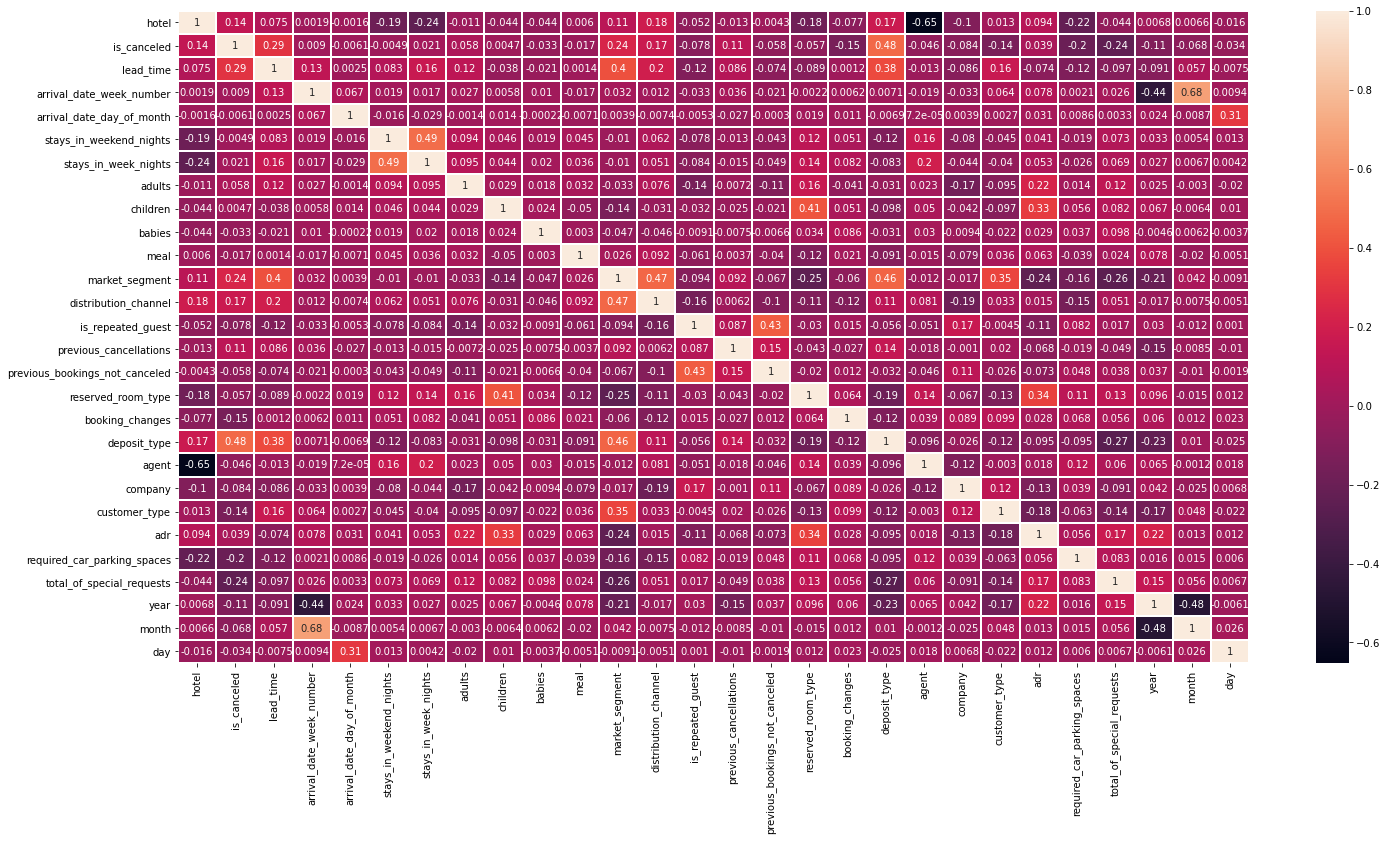

In [46]:
plt.figure(figsize = (24, 12))

corr4 = df_model.corr()
sns.heatmap(corr4, annot = True, linewidths = 1)
plt.show()

In [47]:
df_model

hotel  is_canceled  lead_time  arrival_date_week_number  \
2           0            0          7                        27   
3           0            0         13                        27   
4           0            0         14                        27   
5           0            0         14                        27   
6           0            0          0                        27   
...       ...          ...        ...                       ...   
119385      1            0         23                        35   
119386      1            0        102                        35   
119387      1            0         34                        35   
119388      1            0        109                        35   
119389      1            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  meal  market_segment  \
2                          1       1         0       0     0               0   
3                          1       1         0       0     0               1   
4                          2       2         0       0     0               2   
5                          2       2         0       0     0               2   
6                          2       2         0       0     0               0   
...                      ...     ...       ...     ...   ...             ...   
119385                     5       2         0       0     0               3   
119386                     5       3         0       0     0               2   
119387                     5       2         0       0     0               2   
119388                     5       2         0       0     0               2   
119389                     7       2         0       0     2               2   

        distribution_channel  is_repeated_guest  previous_cancellations  \
2                          0                  0                       0   
3                          1                  0                       0   
4                          2                  0                       0   
5                          2                  0                       0   
6                          0                  0                       0   
...                      ...                ...                     ...   
119385                     2                  0                       0   
119386                     2                  0                       0   
119387                     2                  0                       0   
119388                     2                  0                       0   
119389                     2                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  booking_changes  \
2                                    0                   0                0   
3                                    0                   0                0   
4                                    0                   0                0   
5                                    0                   0                0   
6                                    0                   1                0   
...                                ...                 ...              ...   
119385                               0     

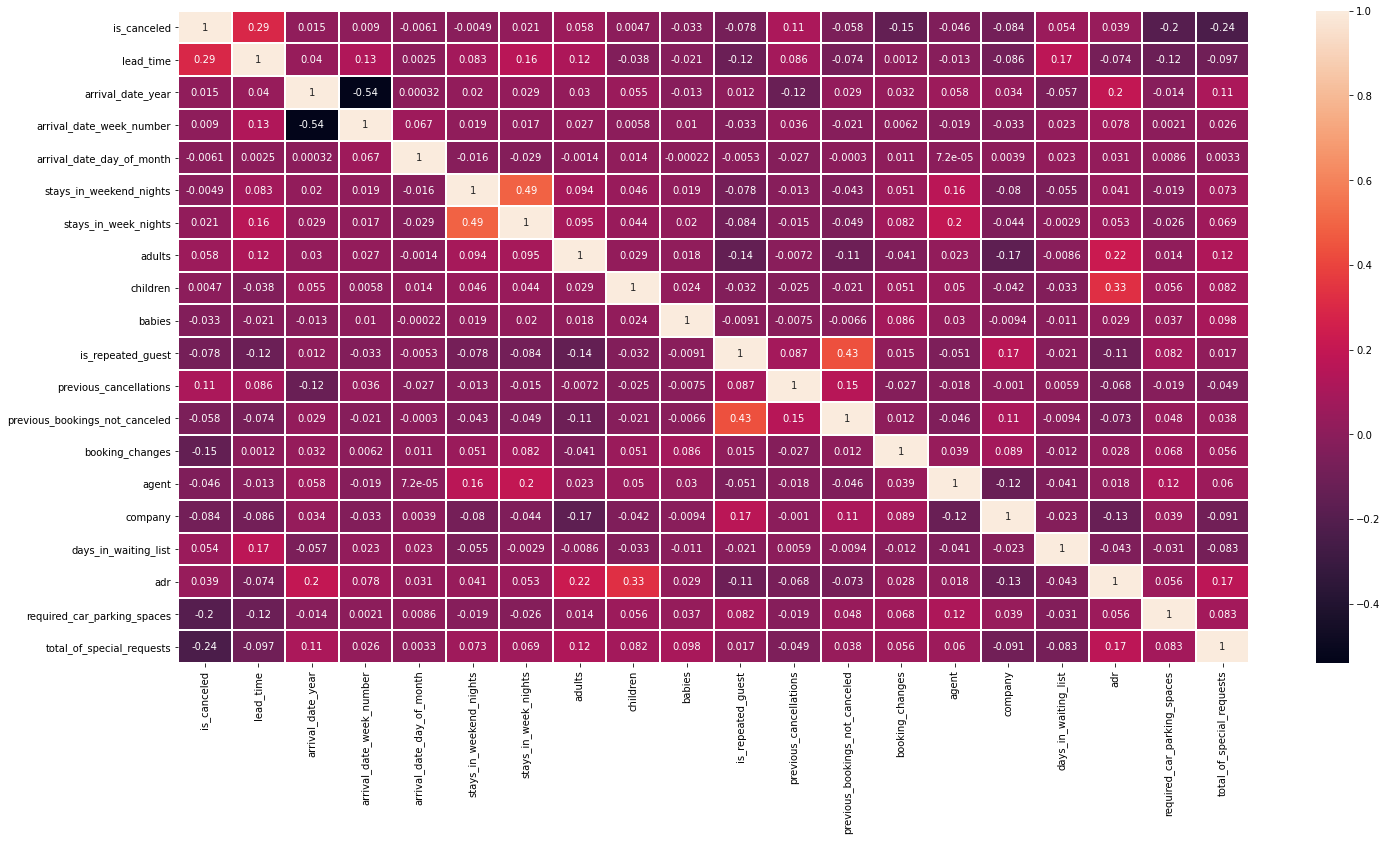

In [65]:
plt.figure(figsize = (24, 12))

corr3 = df1.corr()
sns.heatmap(corr3, annot = True, linewidths = 1)
plt.show()

In [49]:
df1 = pd.read_csv('hotel_bookings.csv')
df1

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [50]:
df1['country'].dropna(inplace=True)

In [51]:
df1.fillna(0, inplace=True)

In [52]:
mask = (df1['adults'] == 0 ) & (df1['children'] == 0 ) & (df1['babies'] == 0)

In [53]:
df1 = df1[~mask]

In [54]:
mask2 = (df1['stays_in_weekend_nights'] == 0) & (df1['stays_in_week_nights'] == 0)

In [55]:
df1 = df1[~mask2]

In [56]:
df1

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
5                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

In [57]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel
import sort_dataframeby_monthorweek as sd

def sort_month(df1, column_name):
    return sd.Sort_Dataframeby_Month(df1, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices

plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1224x576 with 0 Axes>

In [58]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests
final_guests = sort_month(final_guests,'month')
final_guests
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],title='Total no of guests per Months')

In [59]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         20449
1       GBR          9644
2       FRA          8457
3       ESP          6368
4       DEU          6067
..      ...           ...
161     MLI             1
162     TZA             1
163     BHR             1
164     NAM             1
165     FRO             1

[166 rows x 2 columns]

In [60]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

In [61]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [62]:
import datetime as dt
df1['day_of_week'] = df1['reservation_status_date'].dt.day_name()

In [63]:
df1

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
5                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

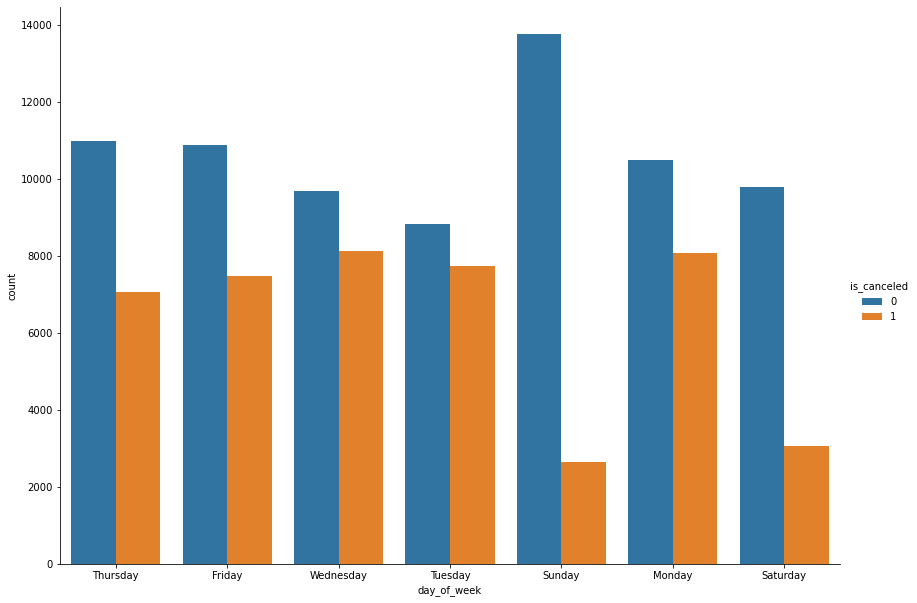

In [64]:
daily_mean = df1[df1['is_canceled'] == 0]
fig = sns.catplot(data = df1, x='day_of_week',kind='count', hue='is_canceled',height=8.27, aspect=11.7/8.27)
fig